In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
mental_df = pd.read_csv('mental-health.csv')
mental_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
mental_df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
mental_df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [8]:
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [9]:
mental_df = mental_df.drop(["Timestamp", 'Country', 'state', 'comments'], axis=1)
mental_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [10]:
mental_df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [11]:
mental_df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [12]:
def fix_invalid_age(age):
    if age < 0 or age > 100:
        age = mental_df["Age"].median()
    return age

In [13]:
mental_df["Age"] = mental_df["Age"].apply(fix_invalid_age)

In [14]:
mental_df["Age"].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49.,  5., 53., 61.,  8., 11., 72.])

In [15]:
mental_df["Gender"] = mental_df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

mental_df["Gender"] = mental_df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')
mental_df["Gender"] = mental_df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other')

In [16]:
mental_df["Gender"].value_counts()

Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

In [17]:
mental_df["self_employed"] = mental_df["self_employed"].fillna(mental_df["self_employed"].mode()[0])

In [18]:
mental_df["work_interfere"] = mental_df["work_interfere"].fillna(mental_df["work_interfere"].mode()[0])

In [19]:
mental_df["no_employees"].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

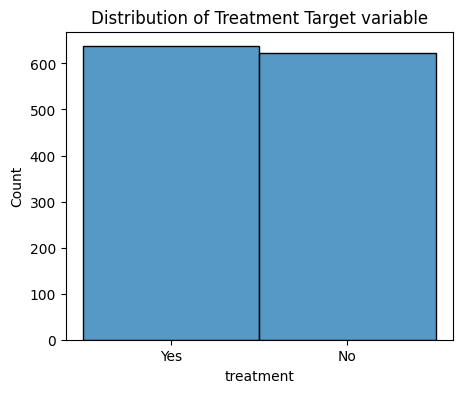

In [20]:
plt.figure(figsize = (5, 4))
sns.histplot(mental_df["treatment"])
plt.title("Distribution of Treatment Target variable")
plt.show()

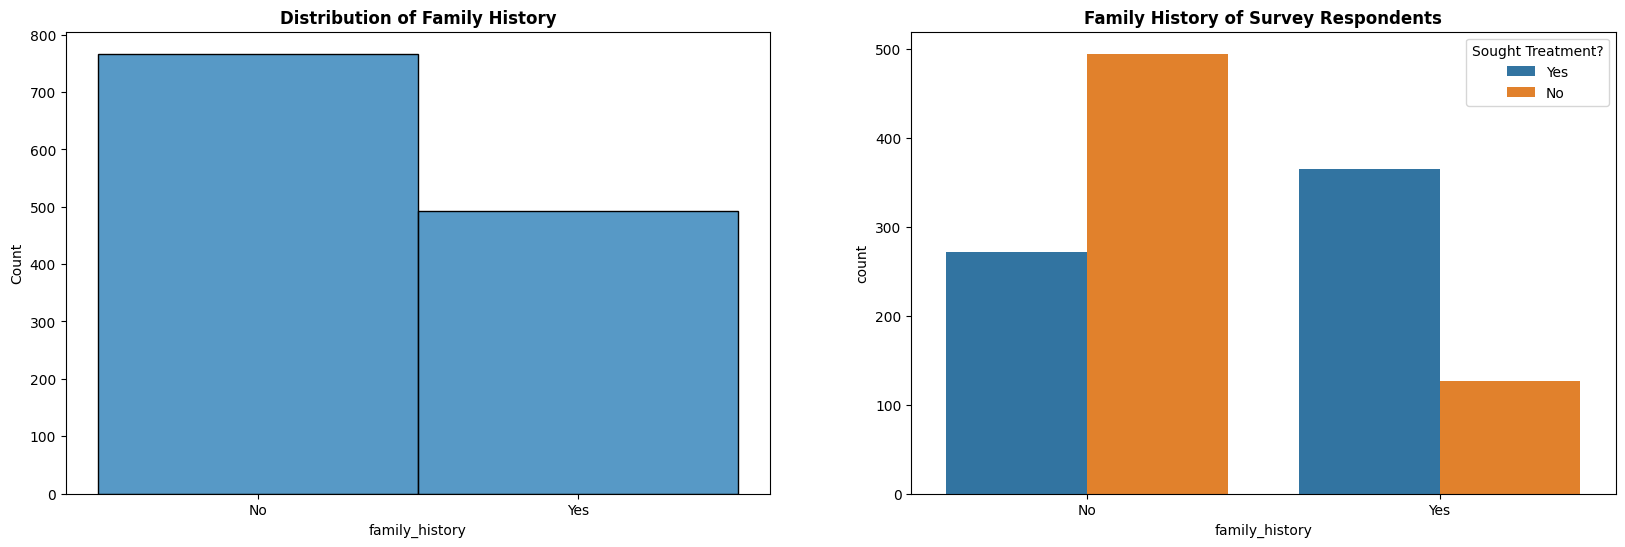

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["family_history"])
plt.title("Distribution of Family History", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='family_history', hue='treatment', data=mental_df)
plt.title('Family History of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sought Treatment?", fontsize=10)
plt.show()

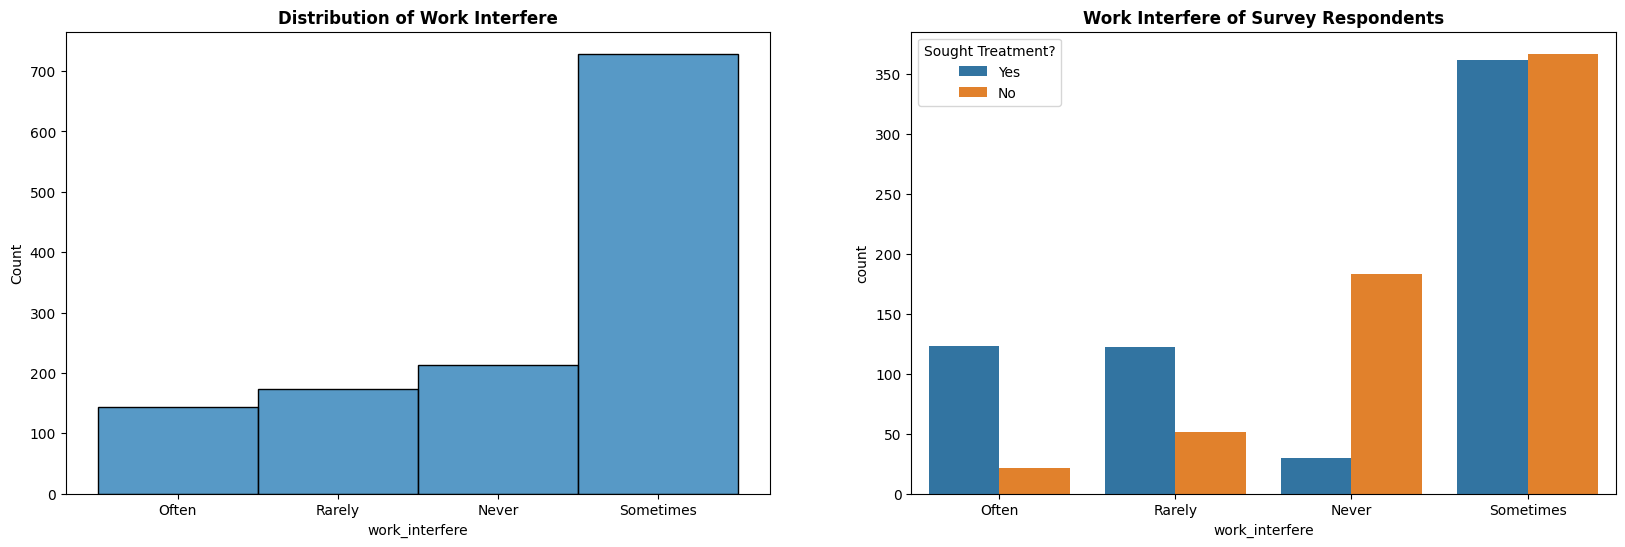

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["work_interfere"])
plt.title("Distribution of Work Interfere", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=mental_df)
plt.title('Work Interfere of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sought Treatment?", fontsize=10)
plt.show()

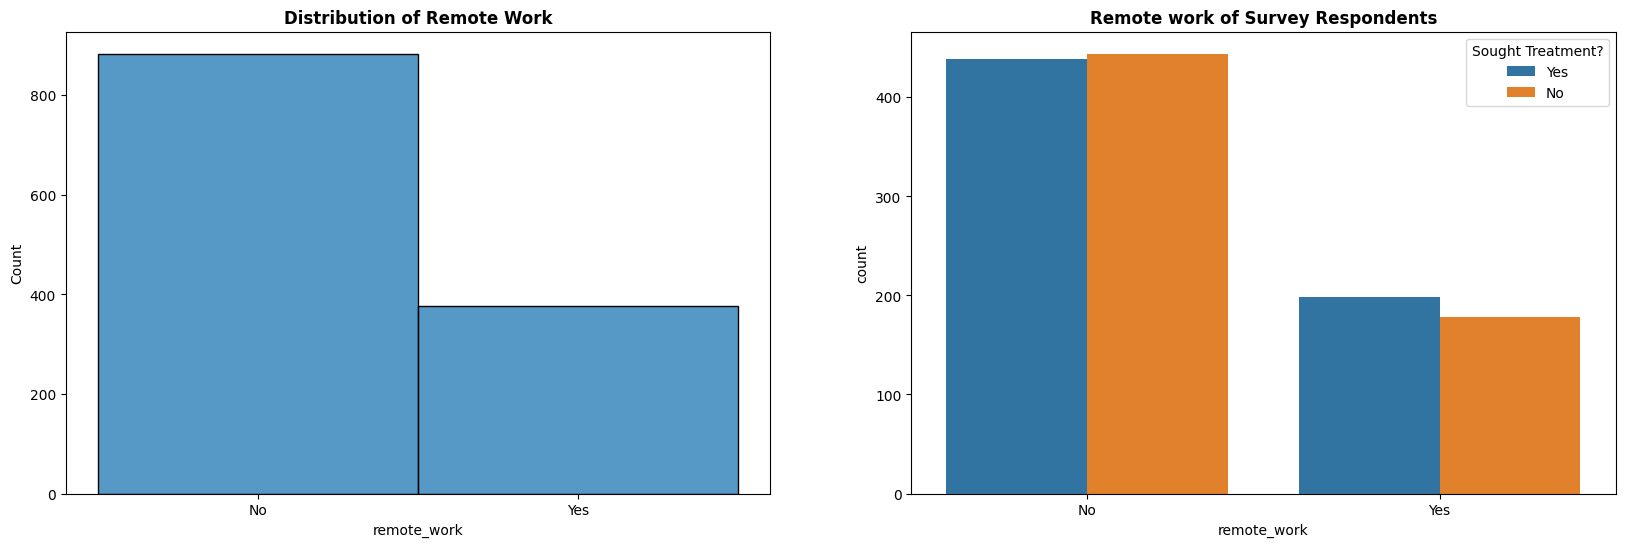

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["remote_work"])
plt.title("Distribution of Remote Work", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=mental_df)
plt.title('Remote work of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sought Treatment?", fontsize=10)
plt.show()

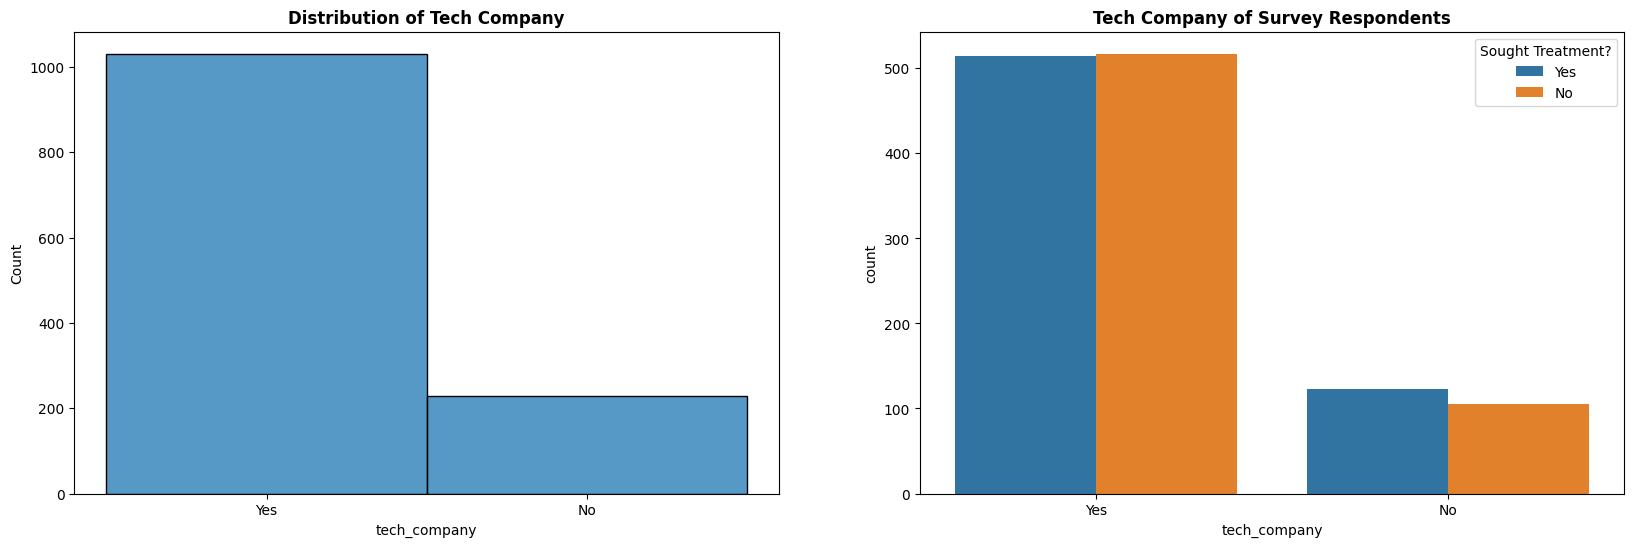

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["tech_company"])
plt.title("Distribution of Tech Company", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=mental_df)
plt.title('Tech Company of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sought Treatment?", fontsize=10)
plt.show()

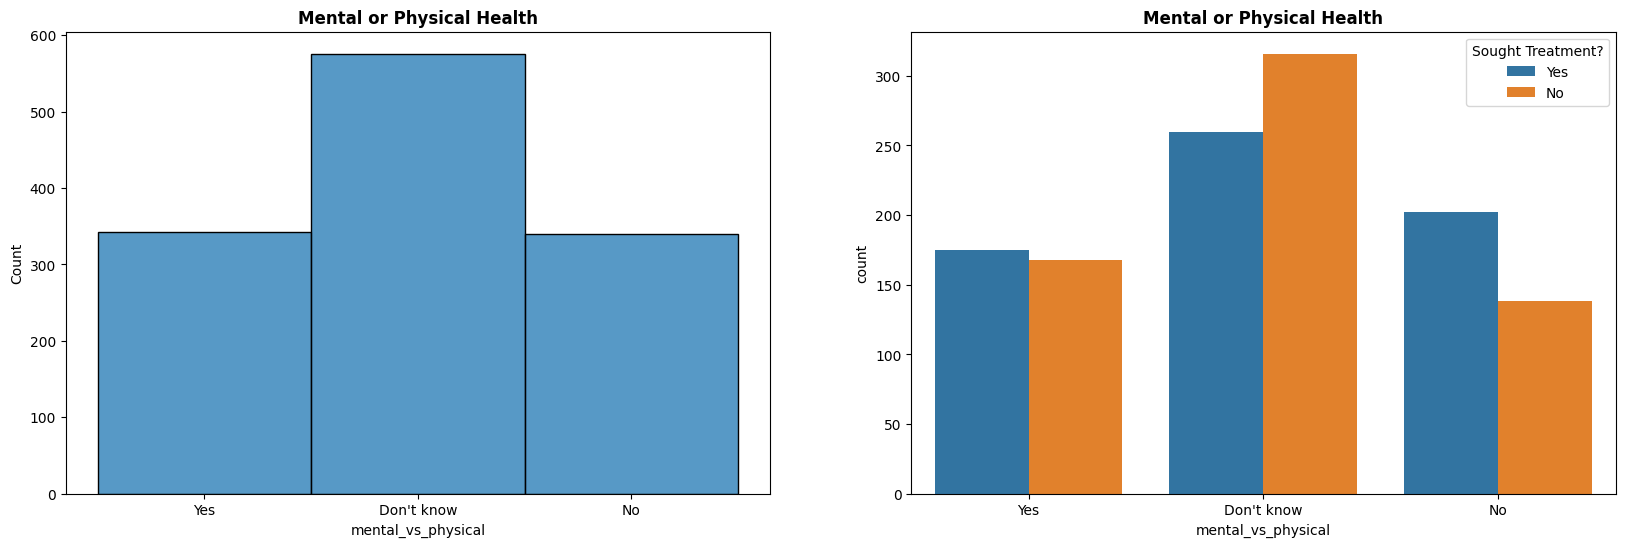

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["mental_vs_physical"])
plt.title("Mental or Physical Health", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='mental_vs_physical', hue='treatment', data=mental_df)
plt.title('Mental or Physical Health', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sought Treatment?", fontsize=10)
plt.show()

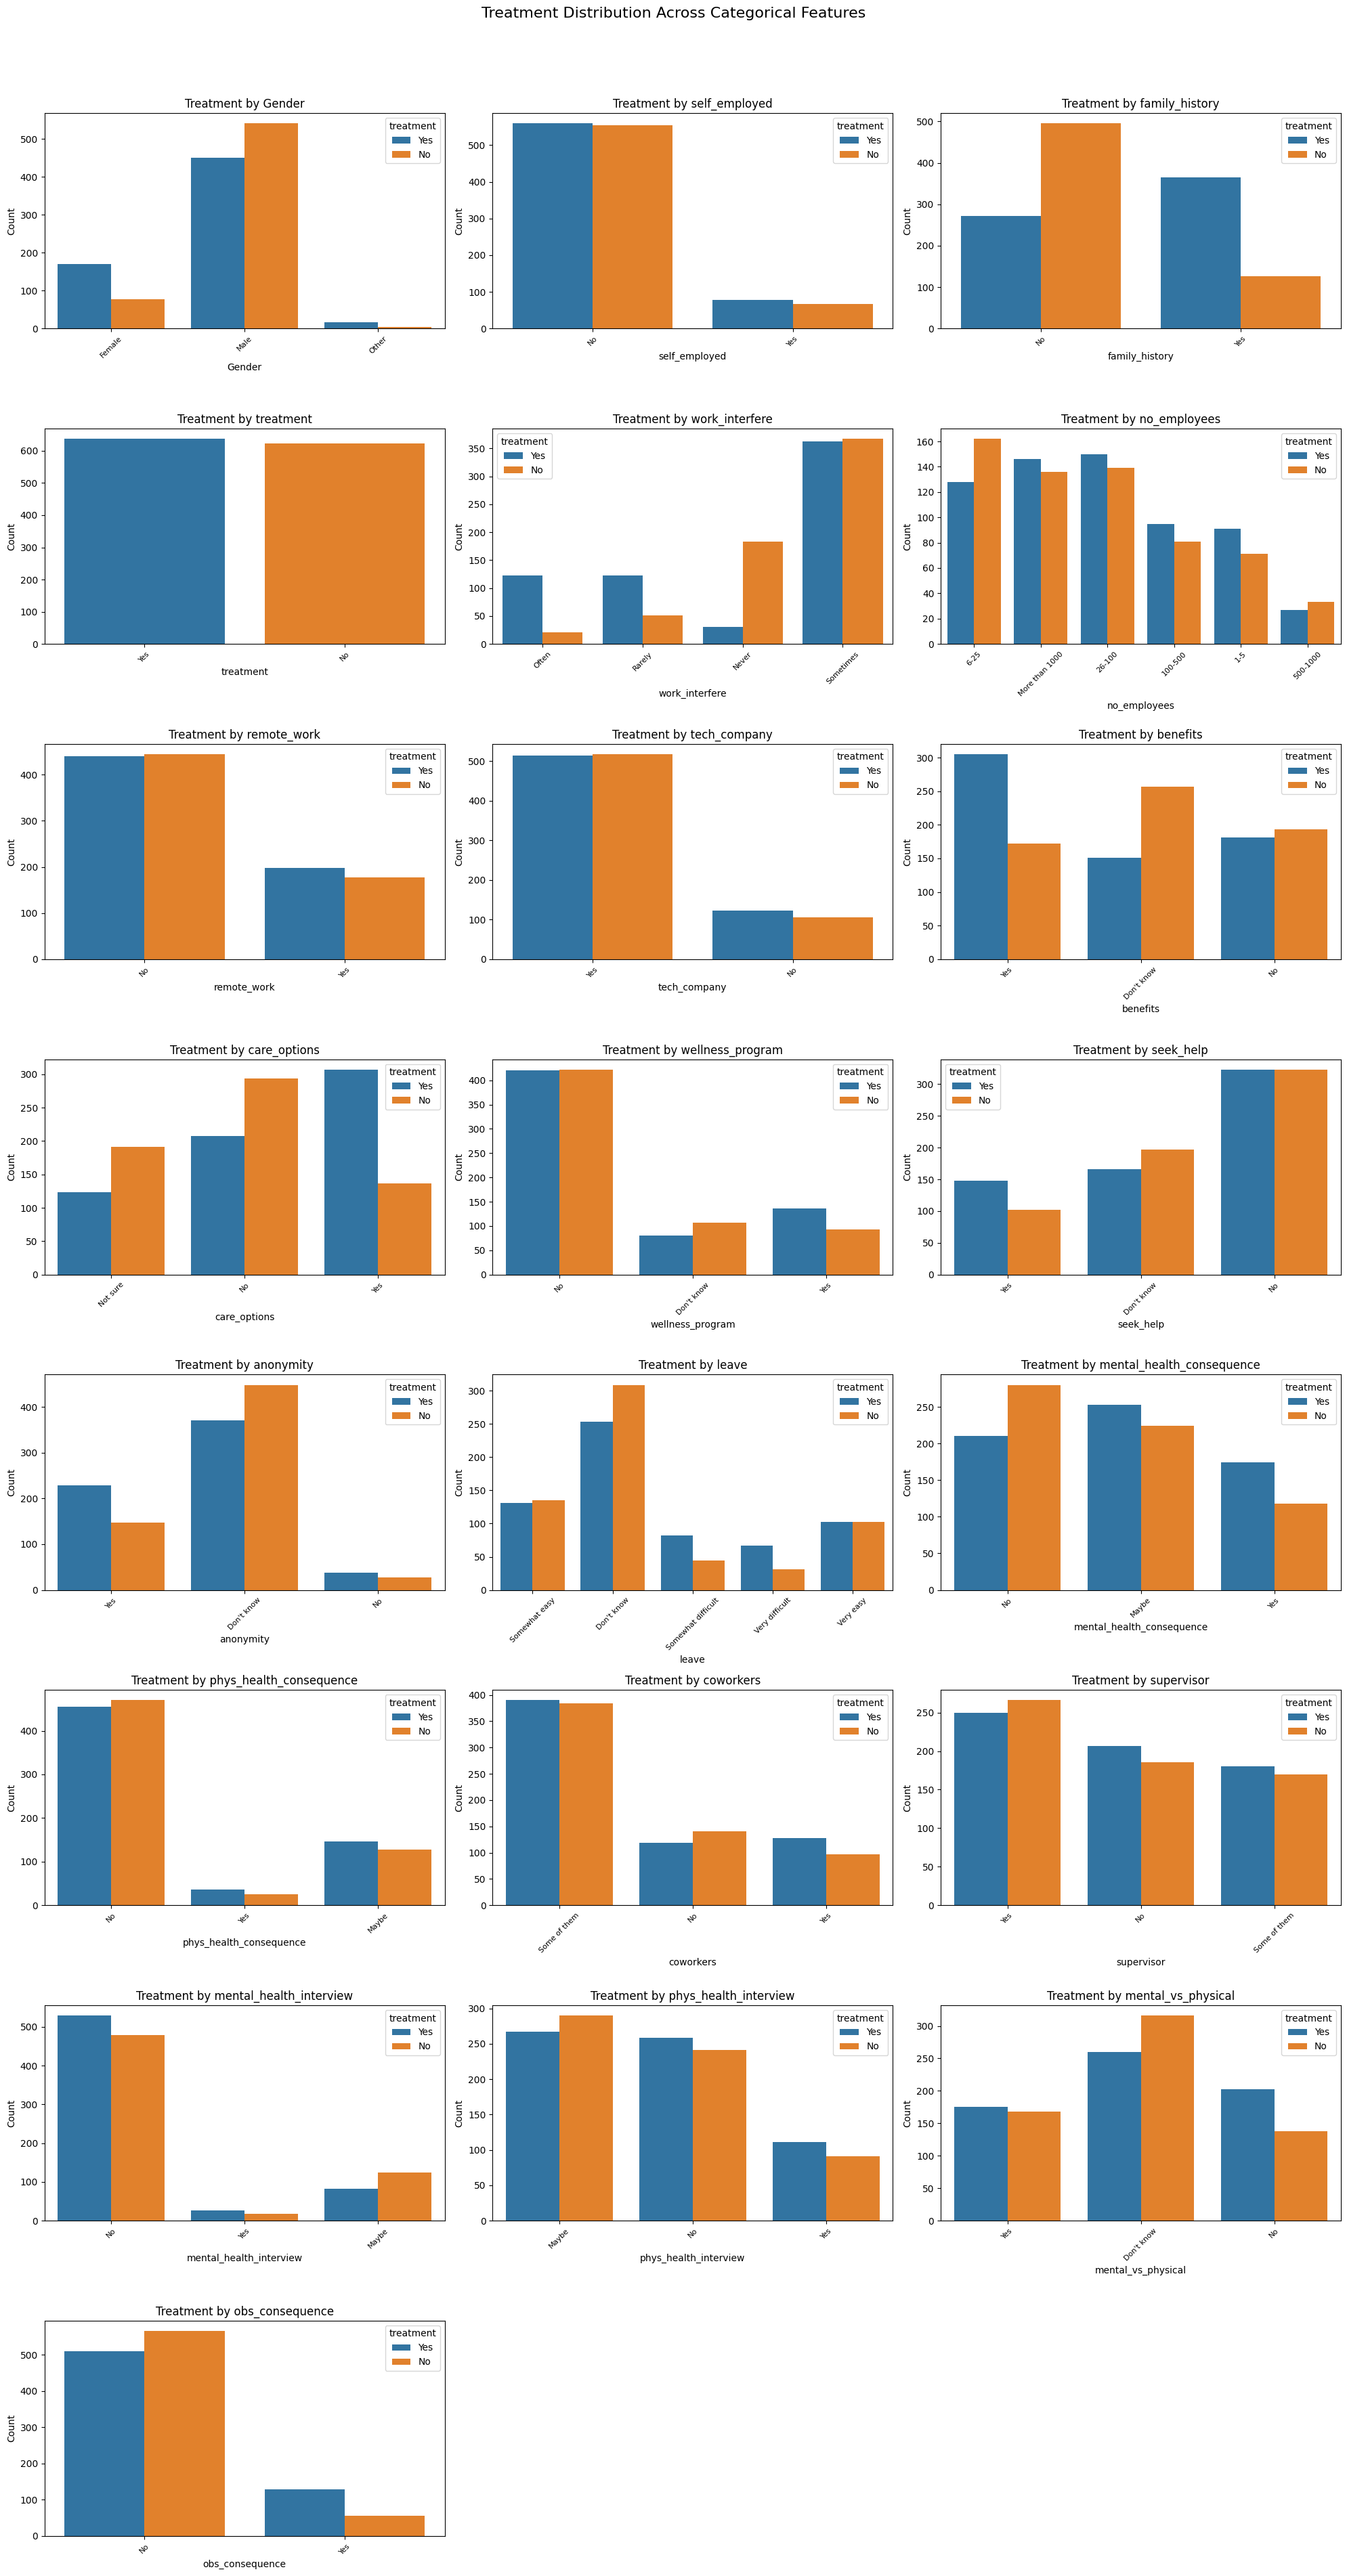

In [26]:
categorical_cols = mental_df.select_dtypes(include='object').columns.tolist()
num_cols = len(categorical_cols)

num_rows = (num_cols + 2) // 3
num_cols_grid = min(num_cols, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_grid, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='treatment', data=mental_df, ax=axes[i])
    axes[i].set_title(f'Treatment by {col}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Treatment Distribution Across Categorical Features', fontsize=16)
plt.show()

In [27]:
mental_df_encoded = pd.get_dummies(mental_df.drop('treatment', axis=1), drop_first=True)
mental_df_encoded.columns

Index(['Age', 'Gender_Male', 'Gender_Other', 'self_employed_Yes',
       'family_history_Yes', 'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_int

In [28]:
corr = mental_df_encoded.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(44, 44))

In [29]:
X = mental_df_encoded
y = mental_df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 101)

In [30]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier()]
models = dict(zip(key,value))
models


{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier()}

In [31]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

C:\avas\avas-ml-project-v2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.7195767195767195
KNeighborsClassifier 0.5555555555555556
DecisionTreeClassifier 0.656084656084656
RandomForestClassifier 0.716931216931217
GradientBoostingClassifier 0.7301587301587301
AdaBoostClassifier 0.7328042328042328


C:\Users\BAJRACHARYAA\AppData\Local\Temp\ipykernel_12640\1480303949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())


Text(0.5, 1.0, 'Plotting the Model Accuracies')

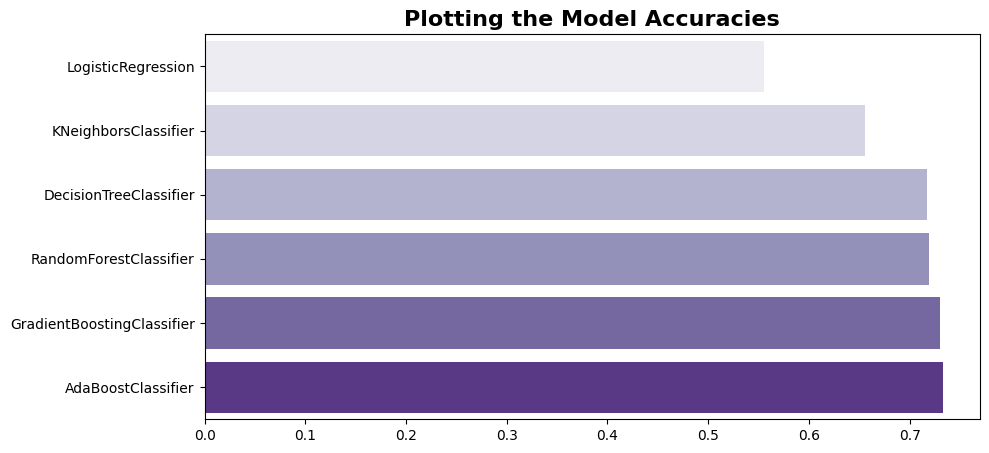

In [32]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(50.722222222222214, 0.5, 'Actual')

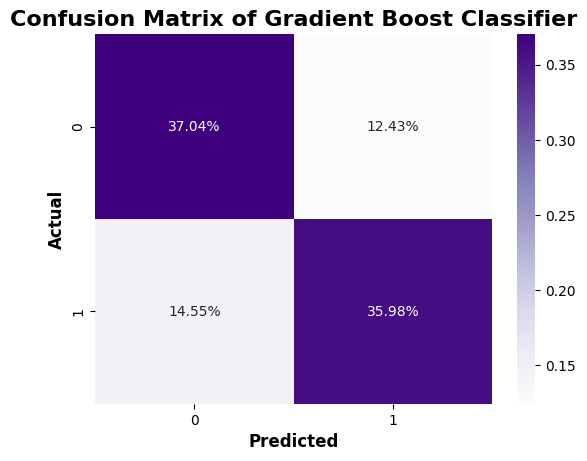

In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

In [34]:
print("\n--- 7. Model Tuning (Hyperparameter Optimization) ---")
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)


--- 7. Model Tuning (Hyperparameter Optimization) ---


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [35]:
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
report_best_gb = classification_report(y_test, y_pred_best_gb)
auc_roc_best_gb = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])

print("\nBest Gradient Boosting Model:")
print(grid_search_gb.best_params_)
print(f"Best Gradient Boosting Accuracy: {accuracy_best_gb:.4f}")
print(f"Best Gradient Boosting Classification Report:\n{report_best_gb}")
print(f"Best Gradient Boosting AUC-ROC Score: {auc_roc_best_gb:.4f}")


Best Gradient Boosting Model:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best Gradient Boosting Accuracy: 0.7249
Best Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          No       0.72      0.73      0.72       187
         Yes       0.73      0.72      0.73       191

    accuracy                           0.72       378
   macro avg       0.72      0.72      0.72       378
weighted avg       0.72      0.72      0.72       378

Best Gradient Boosting AUC-ROC Score: 0.7971



--- Analyzing Feature Importance from the Best Model ---

Top 20 Most Important Features:
                        Feature  Importance
4            family_history_Yes    0.347556
18             care_options_Yes    0.143978
5          work_interfere_Often    0.117819
6         work_interfere_Rarely    0.080875
1                   Gender_Male    0.078520
7      work_interfere_Sometimes    0.052000
0                           Age    0.035498
10        no_employees_500-1000    0.022731
16                 benefits_Yes    0.018577
27         leave_Very difficult    0.015298
33       coworkers_Some of them    0.012627
17        care_options_Not sure    0.006784
25     leave_Somewhat difficult    0.006624
13              remote_work_Yes    0.005145
12  no_employees_More than 1000    0.004744
23                 anonymity_No    0.004202
24                anonymity_Yes    0.004186
19          wellness_program_No    0.004082
35      supervisor_Some of them    0.004053
2                  Gender_Oth

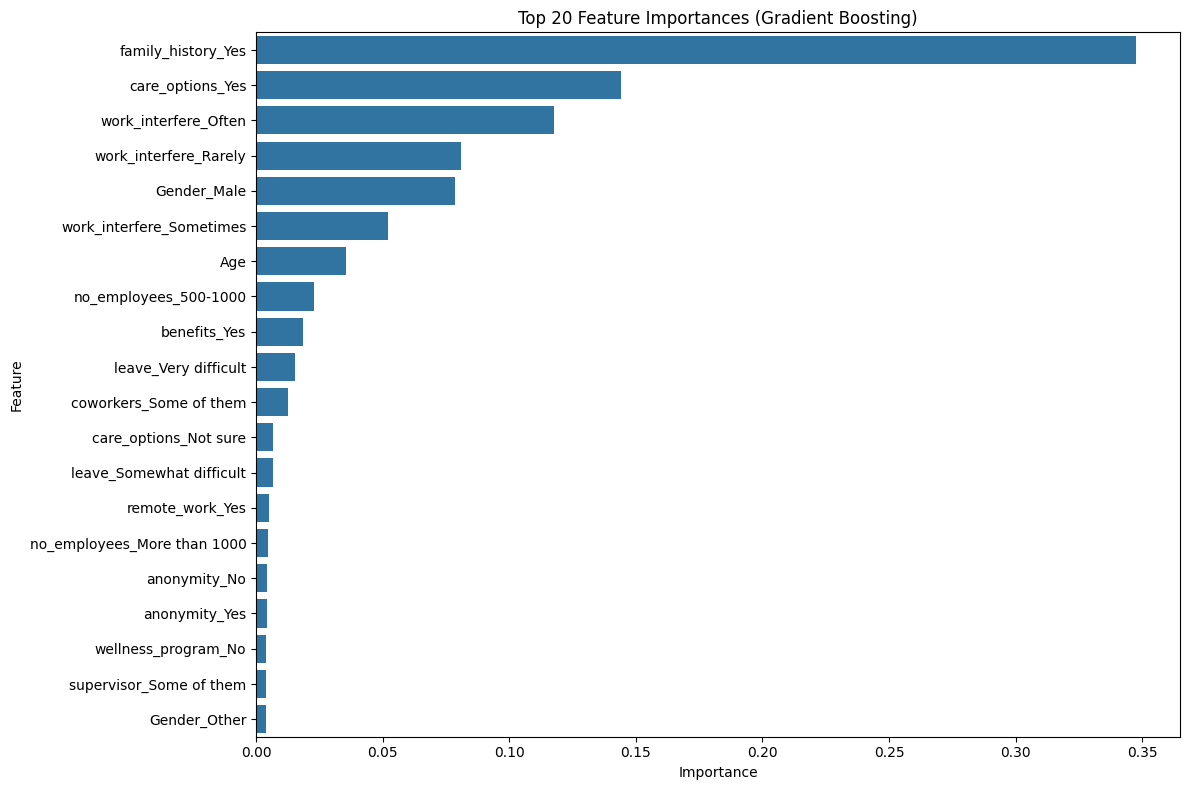

In [36]:
print("\n--- Analyzing Feature Importance from the Best Model ---")

if hasattr(best_gb_model, 'feature_importances_'):
    importances = best_gb_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nTop 20 Most Important Features:")
    print(feature_importance_df.head(20))

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Feature Importances (Gradient Boosting)')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importance is not available for the best model.")